# Water supply and sanitation coverage

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join(path, 'datasets', 'Water and Sanitation Services.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, urban (...",84.0,NaN,World Health Organization (WHO) and United Nat...
1,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, rural (...",46.3,NaN,World Health Organization (WHO) and United Nat...
2,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, total (...",65.8,NaN,World Health Organization (WHO) and United Nat...
3,1,"Total, all countries or areas",2010,"Safely managed sanitation facilities, urban (P...",51.6,NaN,World Health Organization (WHO) and United Nat...
4,1,"Total, all countries or areas",2010,"Safely managed sanitation facilities, rural (P...",27.5,NaN,World Health Organization (WHO) and United Nat...
...,...,...,...,...,...,...,...
2155,716,Zimbabwe,2020,"Safely managed drinking water sources, rural (...",12.9,NaN,World Health Organization (WHO) and United Nat...
2156,716,Zimbabwe,2020,"Safely managed drinking water sources, total (...",29.5,NaN,World Health Organization (WHO) and United Nat...
2157,716,Zimbabwe,2020,"Safely managed sanitation facilities, urban (P...",16.0,NaN,World Health Organization (WHO) and United Nat...
2158,716,Zimbabwe,2020,"Safely managed sanitation facilities, rural (P...",30.2,NaN,World Health Organization (WHO) and United Nat...


In [5]:
df.shape

(2160, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  2160 non-null   int64  
 1   Unnamed: 1           2160 non-null   object 
 2   Year                 2160 non-null   int64  
 3   Series               2160 non-null   object 
 4   Value                2160 non-null   float64
 5   Footnotes            12 non-null     object 
 6   Source               2160 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 118.2+ KB


In [7]:
df.rename(                                                               # rename columns
    columns={
        'Region/Country/Area': 'Code', 
        'Unnamed: 1': 'Region/Country/Area'}, inplace=True)

df.head()    

,Code,Region/Country/Area,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, urban (...",84.0,NaN,World Health Organization (WHO) and United Nat...
1,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, rural (...",46.3,NaN,World Health Organization (WHO) and United Nat...
2,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, total (...",65.8,NaN,World Health Organization (WHO) and United Nat...
3,1,"Total, all countries or areas",2010,"Safely managed sanitation facilities, urban (P...",51.6,NaN,World Health Organization (WHO) and United Nat...
4,1,"Total, all countries or areas",2010,"Safely managed sanitation facilities, rural (P...",27.5,NaN,World Health Organization (WHO) and United Nat...


In [8]:
df.drop(columns=['Footnotes', 'Source'], inplace=True)                      # drop footnotes and source columns

In [9]:
df.head()

,Code,Region/Country/Area,Year,Series,Value
0,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, urban (...",84.0
1,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, rural (...",46.3
2,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, total (...",65.8
3,1,"Total, all countries or areas",2010,"Safely managed sanitation facilities, urban (P...",51.6
4,1,"Total, all countries or areas",2010,"Safely managed sanitation facilities, rural (P...",27.5


In [10]:
df.describe(include='object')   

,Region/Country/Area,Series
count,2160,2160
unique,202,6
top,Azerbaijan,"Safely managed drinking water sources, total (..."
freq,19,490


In [11]:
df['Region/Country/Area'].unique()

array(['Total, all countries or areas', 'Northern Africa',
       'Sub-Saharan Africa', 'Eastern Africa', 'Middle Africa',
       'Southern Africa', 'Western Africa', 'Northern America',
       'Latin America & the Caribbean', 'Caribbean', 'Central America',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'South-eastern Asia', 'Southern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand',
       'Micronesia', 'Polynesia', 'Afghanistan', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Belgium', 'Bhutan', 'Bolivia (Plurin. State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cambodia', 'Canada', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       

In [12]:
df['Year'].value_counts()

2015    715
2010    714
2020    706
2018      9
2019      5
2007      5
2017      3
2016      2
2005      1
Name: Year, dtype: int64

In [13]:
df['Series'].value_counts()

Safely managed drinking water sources, total (Proportion of population with access)    490
Safely managed sanitation facilities, total (Proportion of population with access)     448
Safely managed sanitation facilities, urban (Proportion of population with access)     368
Safely managed drinking water sources, urban (Proportion of population with access)    327
Safely managed sanitation facilities, rural (Proportion of population with access)     280
Safely managed drinking water sources, rural (Proportion of population with access)    247
Name: Series, dtype: int64

In [14]:
df['Code'].value_counts().head()

31     19
1      18
268    18
417    18
296    18
Name: Code, dtype: int64

# Data Cleaning

In [15]:
df['Region/Country/Area'].replace(
    {'C�te d�Ivoire': "Côte d'Ivoire", 
    'Cura�ao': 'Curaçao',
    'R�union': 'Réunion',
    'Saint Barth�lemy': 'Saint Barthélemy'}, inplace=True
)

df['Region/Country/Area'].unique()

array(['Total, all countries or areas', 'Northern Africa',
       'Sub-Saharan Africa', 'Eastern Africa', 'Middle Africa',
       'Southern Africa', 'Western Africa', 'Northern America',
       'Latin America & the Caribbean', 'Caribbean', 'Central America',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'South-eastern Asia', 'Southern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand',
       'Micronesia', 'Polynesia', 'Afghanistan', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Belgium', 'Bhutan', 'Bolivia (Plurin. State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cambodia', 'Canada', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       

In [16]:
df['Value'].describe()

count    2160.000000
mean       58.451898
std        30.657710
min         0.700000
25%        31.075000
50%        59.500000
75%        88.400000
max       100.000000
Name: Value, dtype: float64

<AxesSubplot:xlabel='Value', ylabel='Density'>

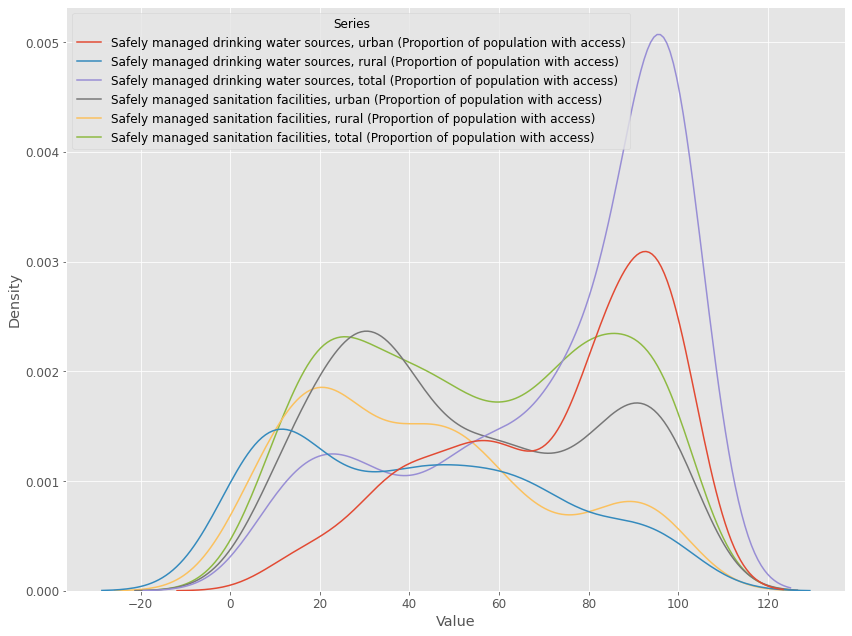

In [17]:
sns.kdeplot(data=df, x='Value', hue='Series')

# Missing Values Exploration

In [18]:
df.isna().sum()

Code                   0
Region/Country/Area    0
Year                   0
Series                 0
Value                  0
dtype: int64

# Grouping and Aggregation

In [19]:
df_grpd = df.groupby(['Region/Country/Area', 'Series'])
df_grpd.head()

,Code,Region/Country/Area,Year,Series,Value
0,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, urban (...",84.0
1,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, rural (...",46.3
2,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, total (...",65.8
3,1,"Total, all countries or areas",2010,"Safely managed sanitation facilities, urban (P...",51.6
4,1,"Total, all countries or areas",2010,"Safely managed sanitation facilities, rural (P...",27.5
...,...,...,...,...,...
2155,716,Zimbabwe,2020,"Safely managed drinking water sources, rural (...",12.9
2156,716,Zimbabwe,2020,"Safely managed drinking water sources, total (...",29.5
2157,716,Zimbabwe,2020,"Safely managed sanitation facilities, urban (P...",16.0
2158,716,Zimbabwe,2020,"Safely managed sanitation facilities, rural (P...",30.2


# Data Visualization

In [20]:
from matplotlib.ticker import FuncFormatter

# y-axis formatter helper function
def format_onedp(x, pos):
    return '%1.1f' % (x * 1)

format_onedp = FuncFormatter(format_onedp)

# line plot helper function
def plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data,
        x=x, y=y, 
        hue=hue, size=size, style=style,
        ax=ax 
    )

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line


# bar plot helper function
def plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.barplot(data=data, x=x, y=y, hue=hue, ax=ax )

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_bar

<function __main__.plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

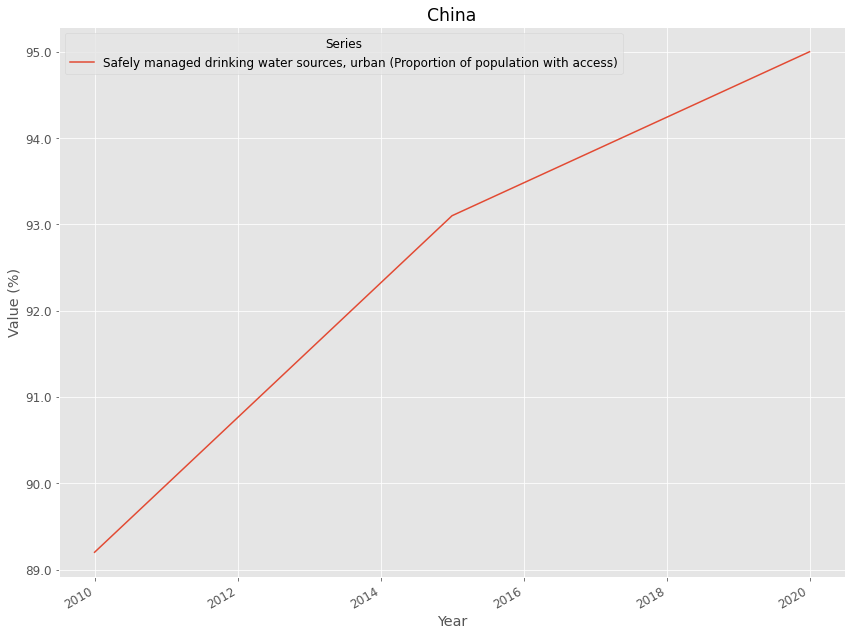

In [21]:
plot_line(
    data=df_grpd.get_group(('China', 'Safely managed drinking water sources, urban (Proportion of population with access)')),
    x='Year', y='Value', hue='Series',
    title='China', xlabel='Year', ylabel='Value (%)', formatter=format_onedp
)

<function __main__.plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, formatter=None)>

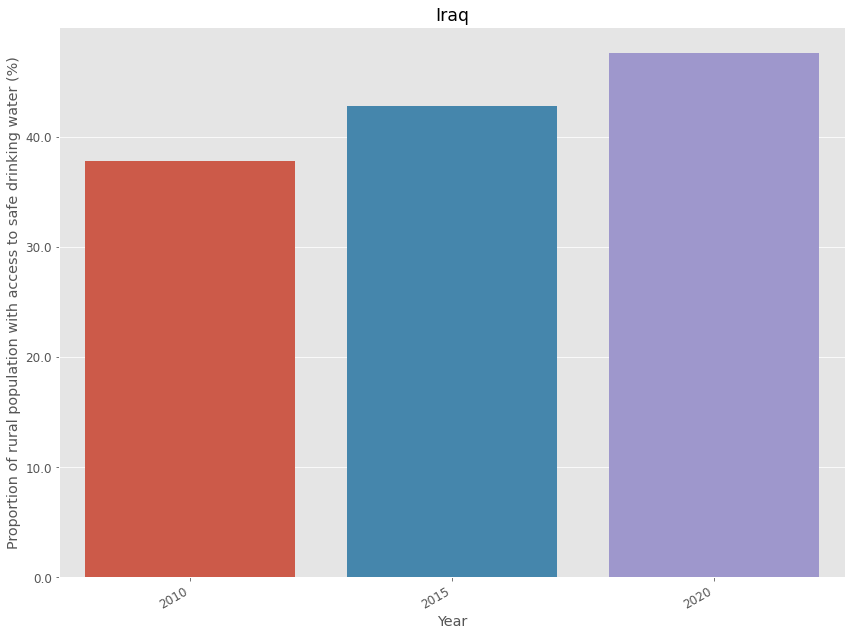

In [22]:
plot_bar(
    data=df_grpd.get_group(('Iraq', 'Safely managed drinking water sources, rural (Proportion of population with access)')),
    x='Year', y='Value', 
    title='Iraq', xlabel='Year', ylabel='Proportion of rural population with access to safe drinking water (%)', 
    formatter=format_onedp
)

<function __main__.plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, formatter=None)>

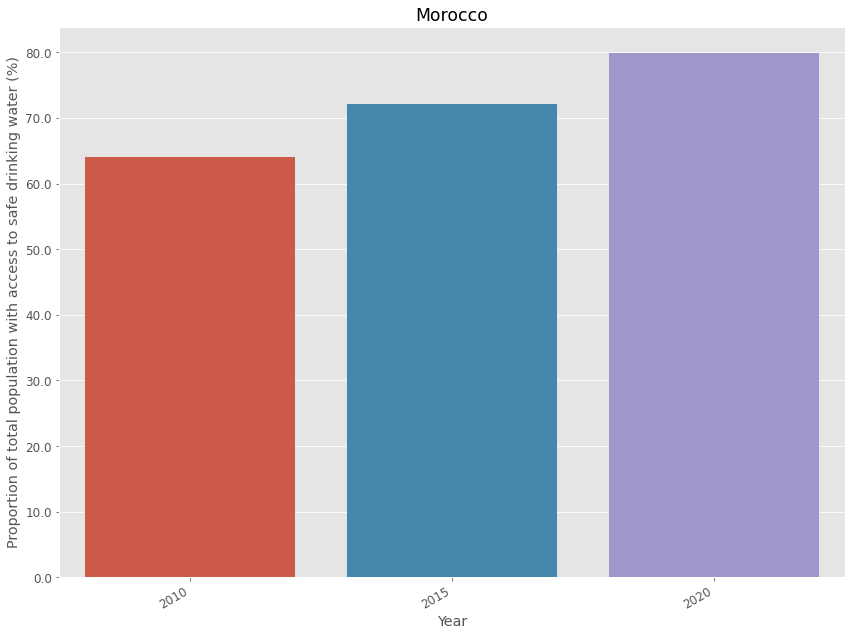

In [23]:
plot_bar(
    data=df_grpd.get_group(('Morocco', 'Safely managed drinking water sources, total (Proportion of population with access)')),
    x='Year', y='Value', 
    title='Morocco', xlabel='Year', ylabel='Proportion of total population with access to safe drinking water (%)', 
    formatter=format_onedp
)

<function __main__.plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

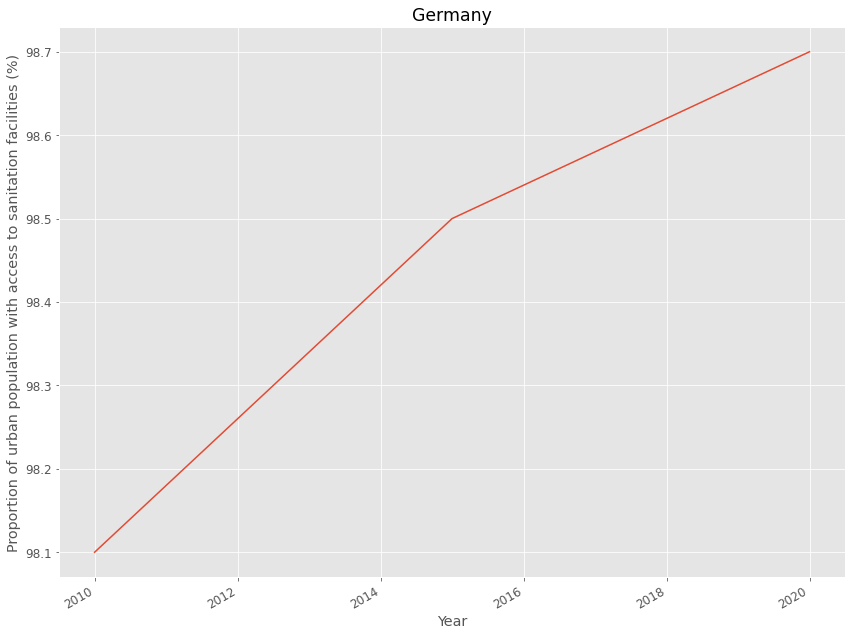

In [24]:
plot_line(
    data=df_grpd.get_group(('Germany', 'Safely managed sanitation facilities, urban (Proportion of population with access)')),
    x='Year', y='Value', 
    title='Germany', xlabel='Year', ylabel='Proportion of urban population with access to sanitation facilities (%)', 
    formatter=format_onedp
)

<function __main__.plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, formatter=None)>

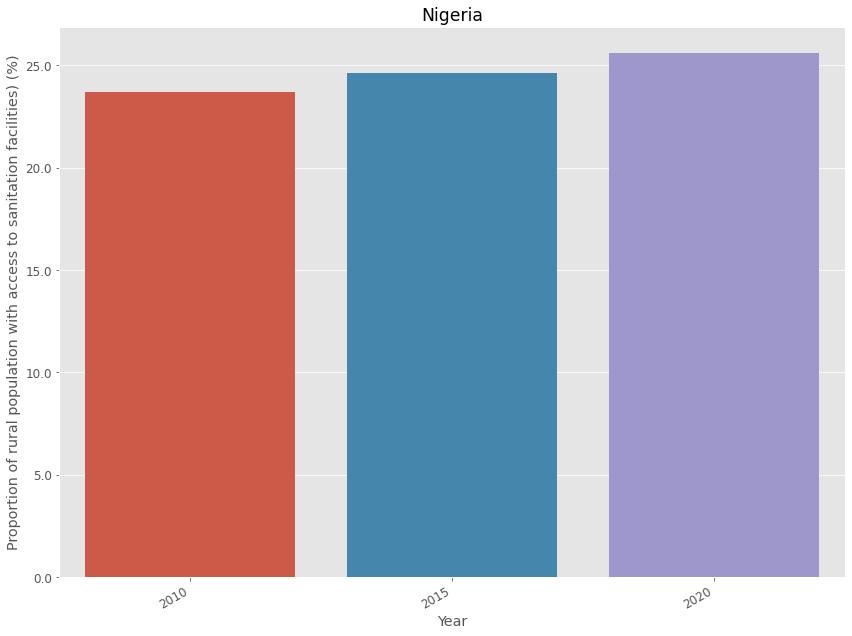

In [25]:
plot_bar(
    data=df_grpd.get_group(('Nigeria', 'Safely managed sanitation facilities, rural (Proportion of population with access)')),
    x='Year', y='Value', 
    title='Nigeria', xlabel='Year', ylabel='Proportion of rural population with access to sanitation facilities) (%)', 
    formatter=format_onedp
)

<function __main__.plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, formatter=None)>

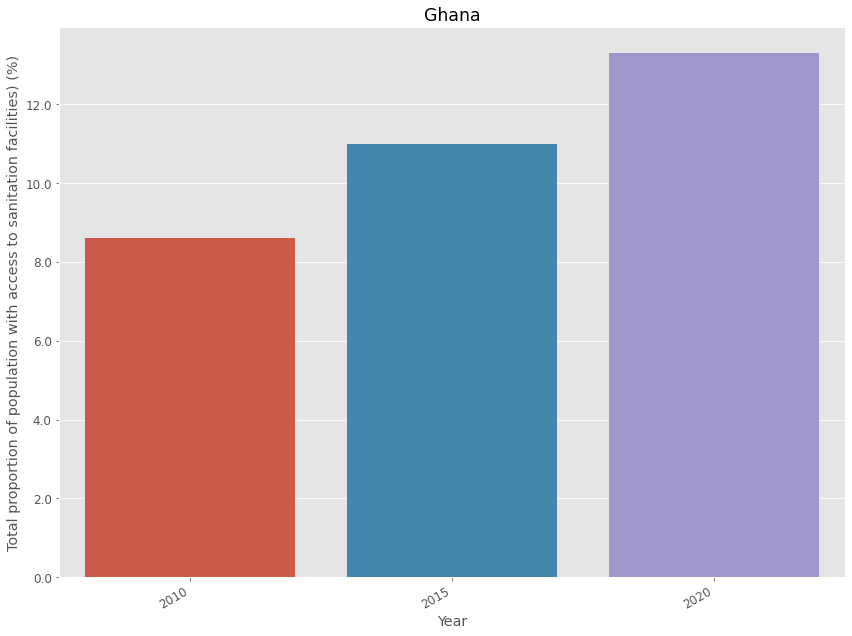

In [26]:
plot_bar(
    data=df_grpd.get_group(('Ghana', 'Safely managed sanitation facilities, total (Proportion of population with access)')),
    x='Year', y='Value', 
    title='Ghana', xlabel='Year', ylabel='Total proportion of population with access to sanitation facilities) (%)', 
    formatter=format_onedp
)